Train features: (5087, 7)
Test features: (570, 7)
Classification Report:

              precision    recall  f1-score   support

   No Planet       1.00      1.00      1.00       565
      Planet       1.00      0.60      0.75         5

    accuracy                           1.00       570
   macro avg       1.00      0.80      0.87       570
weighted avg       1.00      1.00      1.00       570



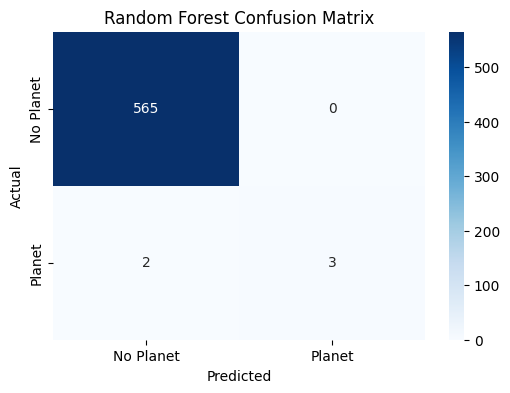

In [1]:
# ---------------------------
# Baseline Model: Random Forest
# ---------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ---------------------------
# Load Data
# ---------------------------
train = pd.read_csv("../data/exoTrain.csv")
test = pd.read_csv("../data/exoTest.csv")

# Convert labels: 2 → Planet (1), 1 → No Planet (0)
train['LABEL'] = train['LABEL'].apply(lambda x: 1 if x==2 else 0)
test['LABEL'] = test['LABEL'].apply(lambda x: 1 if x==2 else 0)

# ---------------------------
# Feature Engineering
# ---------------------------
def extract_features(df):
    labels = df['LABEL'].values
    signals = df.drop(columns=['LABEL']).values
    
    # Calculate simple statistical features
    features = {
        'mean': np.mean(signals, axis=1),
        'std': np.std(signals, axis=1),
        'min': np.min(signals, axis=1),
        'max': np.max(signals, axis=1),
        'median': np.median(signals, axis=1),
        'skew': np.apply_along_axis(lambda x: pd.Series(x).skew(), 1, signals),
        'kurtosis': np.apply_along_axis(lambda x: pd.Series(x).kurtosis(), 1, signals)
    }
    return pd.DataFrame(features), labels

X_train, y_train = extract_features(train)
X_test, y_test = extract_features(test)

print("Train features:", X_train.shape)
print("Test features:", X_test.shape)

# ---------------------------
# Train Random Forest
# ---------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Planet", "Planet"]))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Planet", "Planet"],
            yticklabels=["No Planet", "Planet"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()
